# Procesamiento de imágenes
## 1° Parcial

### Lucas Agustín Kammann

### Legajo 59526

### Fecha 18/09/2021

# Ejercicio 1

Aclaración, hice dos demostraciones, la primera no considero la multiplicación $(-1)^{x+y}$ en la entrada y en la salida, y en la segunda sí la considero. Porque entiendo que en el caso particular que estamos, no afecta, y quería ver que efectivamente era así.

### Demostración 1

Para demostrar analíticamente el resultado obtenido del procesamiento ilustrado, primero defino $f(x,y)$ como la imagen de entrada y $g(x,y)$ como la imagen de salida. Por otro lado, defino sus correspondientes espectros como $F(u,v)$ y $G(u,v)$.

En segundo lugar, la operación de multiplicar por $(-1)^{x+y}$ a las imagenes de entrada y salida tiene por propósito desplazar el espectro en la frecuencia para obtenerlo centrado. En mi análisis podría tener en cuenta esto, pero dado que la operación aplicada es el **conjugado**, realmente no afecta si considero o no este desplazamiento en frecuencia. Por ende, voy a considerar como si no estuviera, por simplificar la demostración.

Entonces, utilizando las definiciones de la **2D-DFT**

$$g(x, y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} G(u, v) \cdot e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}$$

La operación aplicada es $G(u, v) = \overline{F(u,v)}$.

$$g(x, y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} \overline{F(u,v)} \cdot e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}$$

Utilizando propiedades del conjugado,

$$g(x, y) = \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} \overline{F(u,v) \cdot \overline{e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}}}$$

$$g(x, y) = \overline{ \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u,v) \cdot e^{-j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}}$$

$$g(x, y) = \overline{ \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F(u,v) \cdot e^{j \cdot 2\pi \cdot \left[ \frac{u \cdot (-x)}{M} + \frac{v \cdot (-y)}{N} \right]}}$$

Reconociendo que la expresión corresponde a la antitransformada del espectro de la imagen de entrada, se obtiene que,

$$g(x, y) = \overline{ f(-x, -y) }$$

Y como la imagen contiene píxeles con intensidades que son números reales, finalmente,

$$g(x, y) = f(-x, -y)$$

Así, **queda demostrado** que conjugar el espectro de una imagen provoca una inversión espacial en ambas direcciones de la imagen.

### Demostración 2
En este caso, replico la demostración 1, pero sin ignorar la presencia del factor $(-1)^{x+y}$. Sólo a modo de verificar que efectivamente vale lo que expliqué anteriormente. En este caso, se habla de $F'(u,v)$ como el espectro de la imagen de entrada con esa transformación y de $G'(u,v)$ como el espectro de la imagen de salida sin haber aplicado la transformación.

$$g(x, y) = (-1)^{x+y} \cdot \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} G'(u, v) \cdot e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}$$

La operación aplicada es $G'(u, v) = \overline{F'(u,v)}$.

$$g(x, y) = (-1)^{x+y} \cdot \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} \overline{F'(u,v)} \cdot e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}$$

$$g(x, y) =  (-1)^{x+y} \cdot \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} \overline{F'(u,v) \cdot \overline{e^{j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}}}$$

$$g(x, y) = (-1)^{x+y} \cdot \overline{ \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F'(u,v) \cdot e^{-j \cdot 2\pi \cdot (\frac{u \cdot x}{M} + \frac{v \cdot y}{N})}}$$

$$g(x, y) =  (-1)^{x+y} \cdot \overline{ \sum_{u=0}^{M-1} \sum_{v=0}^{N-1} F'(u,v) \cdot e^{j \cdot 2\pi \cdot \left[ \frac{u \cdot (-x)}{M} + \frac{v \cdot (-y)}{N} \right]}}$$

Donde $F'(u,v) = F \{f(x,y) \cdot (-1)^{x+y}\}$

$$g(x, y) = (-1)^{x+y} \cdot \overline{ f(-x, -y) \cdot (-1)^{-x-y} }$$

$$g(x, y) = (-1)^{x+y} \cdot f(-x, -y) \cdot (-1)^{-x-y}$$

$$g(x, y) = f(-x, -y)$$

Así, **queda demostrado** que conjugar el espectro de una imagen provoca una inversión espacial en ambas direcciones de la imagen.

# Ejercicio 2
Lo hice de dos formas, usando el factor $(-1)^{x+y}$ o usando la operación fftshift, es decir, realizando el desplazamiento desde el dominio del espacio o del dominio de la frecuencia.

### Forma N° 1: Usando fftshift
Aclaración, sabiendo que el objetivo de multiplicar las imagenes de entrada y salida por el factor $(-1)^{x+y}$ es centrar el espectro cuando se realizan operaciones de filtrado, entonces opté por hacer lo mismo pero sin eso, es decir utilizando directamente **fftshift** con el espectro para centrarlo. De esta forma, el código queda más compacto y fácil de entender.

De hecho, me parece interesante comentar que esa operación la hacemos comúnmente porque de esa forma al quedar el espectro centrado, es más fácil definir las operaciones de filtrado. Dado que en este caso en particular sólo nos importa aplicar el operador **conjugado**, en realidad utilizar o no espectro centrado no hace diferencia alguna al resultado buscado en este caso particular.

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Open the image
ex2_input_image = cv2.imread('DIPimage.jpg', cv2.IMREAD_GRAYSCALE)

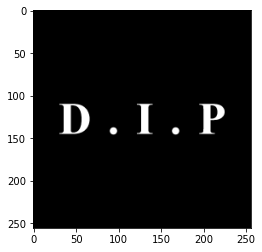

In [5]:
# Plot the image
plt.imshow(ex2_input_image, cmap='gray', vmin=0, vmax=255)

In [6]:
# Compute the DFt using the FFT algorithm
ex2_input_spectrum = np.fft.fftshift(np.fft.fft2(ex2_input_image))

In [7]:
# Apply the frequency domain processing
ex2_output_spectrum = np.conj(ex2_input_spectrum)

In [8]:
# Compute the DFT using the FFT algorithm
ex2_output_image = np.real(np.fft.ifft2(np.fft.fftshift(ex2_output_spectrum)))

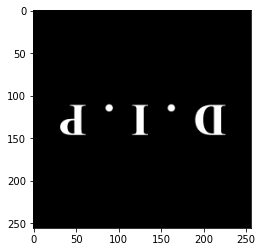

In [9]:
# Plot the image
plt.imshow(ex2_output_image, cmap='gray', vmin=0, vmax=255)

### Forma N° 2: Usando $(-1)^{x+y}$

In [10]:
import cv2

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt

In [13]:
# Open the image
ex2_input_image = cv2.imread('DIPimage.jpg', cv2.IMREAD_GRAYSCALE)

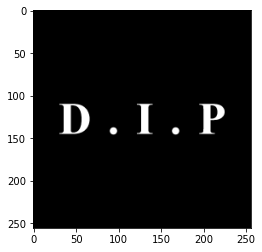

In [14]:
# Plot the image
plt.imshow(ex2_input_image, cmap='gray', vmin=0, vmax=255)

In [15]:
# Normalization to avoid numerical problems
ex2_input_image = ex2_input_image / 255

In [16]:
# Preprocessing the image before computing the DFT
N, M = ex2_input_image.shape
for i in range(N):
    for j in range(M):
        ex2_input_image[i, j] *= np.power(-1, i+j)

In [17]:
# Compute the DFT using the FFT algorithm
ex2_input_spectrum = np.fft.fft2(ex2_input_image)

In [18]:
# Apply the frequency domain processing
ex2_output_spectrum = np.conj(ex2_input_spectrum)

In [19]:
# Compute the DFt using the FFT algorithm
ex2_output_image = np.real(np.fft.ifft2(ex2_output_spectrum))

In [20]:
# Preprocessing the image before computing the DFT
N, M = ex2_output_image.shape
for i in range(N):
    for j in range(M):
        ex2_output_image[i, j] *= np.power(-1, i+j)

In [21]:
# Desnormalization to go back to 8 bits
ex2_output_image = np.array(ex2_output_image * 255, dtype=np.uint8)

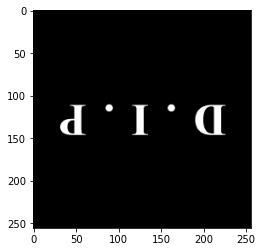

In [22]:
# Plot the image
plt.imshow(ex2_output_image, cmap='gray', vmin=0, vmax=255)

# Ejercicio 3
La imagen A, por lo que se puede observar de su histograma, diría que tiene un contraste medio o bajo, ya que no está aprovechando el rango dinámico completo de los niveles de grises, y además se encuentra situada en las altas intensidades. Luego de la transformación, observo que en la imagen B, la forma del histograma es similar, sólo que fue expandido al rango completo, obteniendo así un mejor contraste resultante. Entonces, diría que se aplicó la **transformación T1**. Para llegar a tal conclusión, me percaté que la forma de la transformación T1 permite mapear un conjunto de niveles de grises **r** desde un intervalo como el que tiene presente la imagen original, al rango completo. Esto es por ver desde donde hasta donde llega la forma casi lineal en los ejes X y los ejes Y de la transformación.

Es decir, está expandiendo el conjunto de grises presente en la imagen A para ocupar todo el rango dinámico posible.

Por otro lado, no podría ser la transformación T2, porque al tener una baja pendiente en la zona de intensidades presentes en la imagen A, se ven comprimidas y eso genera un efecto opuesto al obtenido en la imagen B.

# Ejercicio 4
En primer lugar, noté que las imagenes son (originalmente) la misma sólo que con diferentes filtrados aplicados. De todas las imágenes, la A es la que percibo sin ningún tipo de tratamiento o filtrado, por ende correspondería a la imagen original, y por eso es que concluyo que se le aplico un pasatodo. Porque de esa forma no se elimina ninguna frecuencia y permanece la imagen intacta. Eso derivó en decir que la imagen A posee la FFT 2, y eso es un pasatodo.

En segundo lugar, noté que la imagen C es una versión borrosa (blurred) de la original, y dado que ese efecto borroso es consecuencia de un suavizado de trasiciones abruptas y bordes en la imagen, se dice que se eliminaron altas frecuencias, pero sin afectar a las bajas. Por eso concluyo que se le aplico un filtro pasabajos, y por eso elegí la FFT 1.

En tercer lugar, la imagen B tiene un fondo gris y muestra marcadamente los bordes de los objetos de la imagen original. Los bordes corresponden a transiciones abruptas de contenido de altas frecuencias, y como no sobrevive nada más, entonces concluyo que se le aplicó un pasa altos. Por eso, elegí la FFT 4.

Finalmente, la imagen D, por descarte, sería la de la FFT 3 que es característico de un pasabanda. En cierta forma se puede percibir que remueve las bajas frecuencias ya que se pierde el color uniforme del abrigo de la persona que sería muy baja frecuencia, pero deja cierta información que caería en las frecuencias pasantes del filtro como pueden ser las patas de la cámara.

La **imagen A posee la FFT 2**, que corresponde a un **pasa todo**.

La **imagen B posee la FFT 4**, que corresponde a un **pasa altos**.

La **imagen C posee la FFT 1**, que corresponde a un **pasa bajos**.

La **imagen D posee la FFT 3**, que corresponde a un **pasa banda**.

# Ejercicio 5

### Item A
El High Boost es una técnica de mejoramiento de imágenes, mediante la cual se aumenta la calidad percibida en las mismas. Por un lado, mejora las imágenes borrosas, ya que permite enfatizar los bordes (contenido de alta frecuencia) de la imagen, y además permite aumentar el brillo del fondo en imágenes oscuras. Es una técnica que nació, originalmente, en la época analógica y consistía en superponer la imagen original con el negativo de una versión borrosa, que se obtenía al desenfocar la lente durante la captura de la imagen. Esto se puede interpretar como restarle a la imagen el contenido de baja frecuencia, lo cual incrementa o enfatiza la presencia de las altas frecuencias, marcando más los bordes y disminuyendo cuán borrosa se percibe.

Hoy en día, en el campo digital se hace algo equivalente, pero se multiplica con un coeficiente a la imagen original para garantizar que sobreviva con mayor brillo el fondo.

$$f_{HB}(x,y) = A \cdot f(x,y) - f_{LP}(x,y)$$

Donde HB corresponde a High Boost y LP corresponde a Low Pass. Operando la expresión, se puede llegar a la siguiente forma,

$$f_{HB}(x,y) = (A - 1) \cdot f(x,y) + f(x,y) - f_{LP}(x,y)$$

$$f_{HB}(x,y) = (A - 1) \cdot f(x,y) + f_{HP}(x,y)$$

Entonces, para agregar la parte de alta frecuencia de HP (High Pass), se utiliza el filtro laplaciano, de esta forma se llega al siguiente kernel.

\begin{vmatrix}
    -1 & -1 & -1 \\
    -1 & A+8 & -1 \\
    -1 & -1 & -1 \\
\end{vmatrix}


## Item B

In [23]:
import cv2

In [24]:
import numpy as np

In [25]:
import matplotlib.pyplot as plt

In [26]:
# Open the image
ex5_image = cv2.imread('testHB.png', cv2.IMREAD_GRAYSCALE)

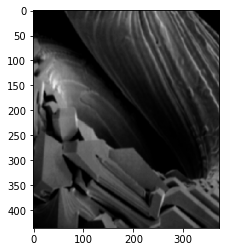

In [27]:
# Plot the image
plt.imshow(ex5_image, cmap='gray', vmin=0, vmax=255)

In [28]:
# Create the kernel for the high-boost filter
ex5_A = 1.5
ex5_kernel = -np.ones((3, 3))
ex5_kernel[1, 1] = ex5_A + 8

# Verify the image
print(ex5_kernel)

[[-1.  -1.  -1. ]
 [-1.   9.5 -1. ]
 [-1.  -1.  -1. ]]


In [29]:
# Filter the image
ex5_image_hb = cv2.filter2D(ex5_image, -1, ex5_kernel)

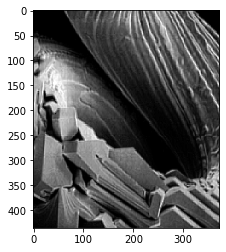

In [30]:
# Show the resulting image
plt.imshow(ex5_image_hb, cmap='gray', vmin=0, vmax=255)